# **INSURANCE CHARGES PREDICTION**

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the Charges of the Insurance is affected by the independent variables such as 'age', 'sex', 'bmi', 'children', 'smoker' and 'region'.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/mirichoi0218/insurance
- The data consists of 7 column and 1338 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn, Plotly and Warnings Library.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Import the Dataset as Pandas DataFrame and
#### Showing the top 5 Rows

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Showing the Shape of Data

In [3]:
df.shape

(1338, 7)

## 2.2 Dataset Information
- Age: Age of the benificiary min 18Y and max 64Y.
- Sex: Aender of the insurance contractor(Male,Female)
- BMI: Bmi is a Body Mass Index which is use to measure the ratio of the body weight and height. To measure the bmi   using (kg/m^2). Here are the general BMI categories.
    1. Underweight: BMI less than 18.5
    2. Normal weight: BMI between 18.5 and 24.9
    3. Overweight: BMI between 25 and 29.9
    4. Obesity: BMI of 30 or greater
- Children: Number of children covered by health insurance.
- Smoker: Person Smoking of not.
- Region: Region of the Benificiary (northeast,northwest,southeast,southwest)
- Charges: Individual medical costs billed by health insurance

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type and count non-null values
- Check the number of unique values of each column
- Check statistics of data set
- Check the different numerical and categorical columns.
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### There is no missing values in the dataset.

#### 3.2 Checking Duplicates

In [5]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


##### One Duplicate value found 
##### Simply we drop the duplicate value and reset the index

In [6]:
df = df.drop_duplicates().reset_index(drop=True)

#### 3.3 Checking Data Type and count Not-Null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


#### 3.4 Checking the Unique Values in each column

In [8]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#### 3.5 Checking Statistics of Dataset

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### 3.6 Checking the differnet numerical and categorical columns.

In [10]:
# Defining the numerical and categorical columns.
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']      # O = Object
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print()
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


#### 3.7 Checking the various categories in different categorical columns.

In [11]:
print("Categories in sex:  ", df['sex'].unique())

print("Categories in smoker:  ", df['smoker'].unique())

print("Categories in region:  ", df['region'].unique())

Categories in sex:   ['female' 'male']
Categories in smoker:   ['yes' 'no']
Categories in region:   ['southwest' 'southeast' 'northwest' 'northeast']


### 4 Exploratory Data (Visualization)

#### 4.1 Visualizing the charges of the different categorical columns to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

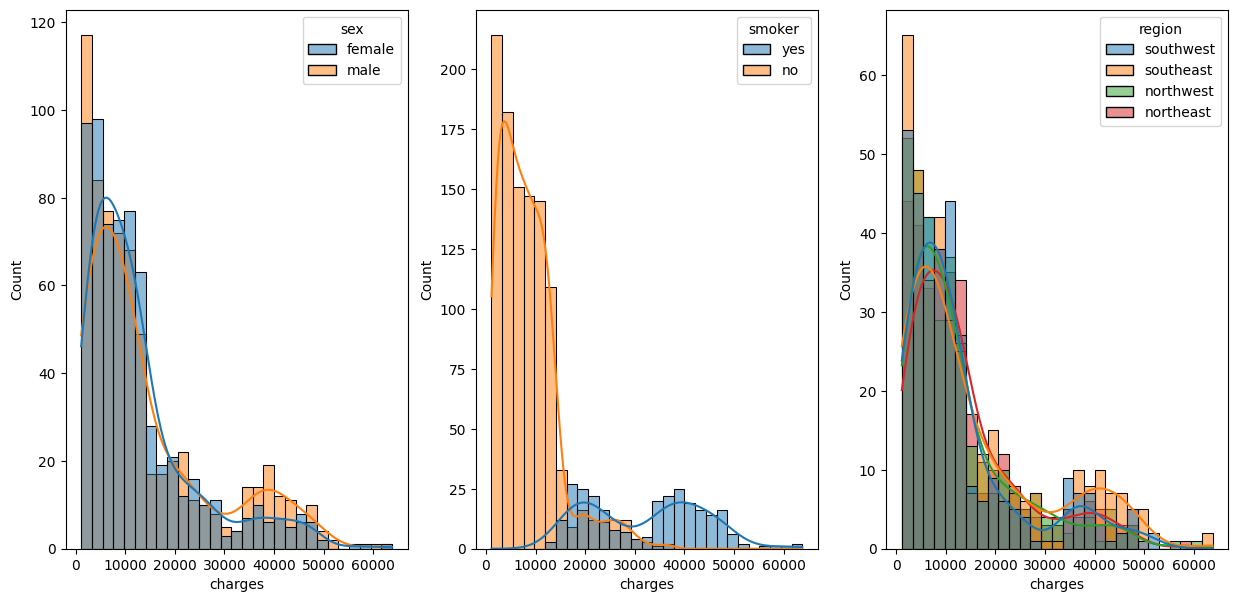

In [12]:
plt.figure(figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='charges',kde=True,hue='sex')

plt.subplot(132)
sns.histplot(data=df,x='charges',kde=True,hue='smoker')

plt.subplot(133)
sns.histplot(data=df,x='charges',kde=True,hue='region')


plt.show()

##### Insights
- In First Graph, Male benificiary gives more charges as compare to the Female benificiary.
- In Second Graph, Smokers gives more charges as compare to non smokers. The majority is a non-smoker.
- In Third Graph, No better conclusion found.

#### 4.2 Plotting the Distribution of 'Age', 'BMI' and 'Charges',
- Histogram

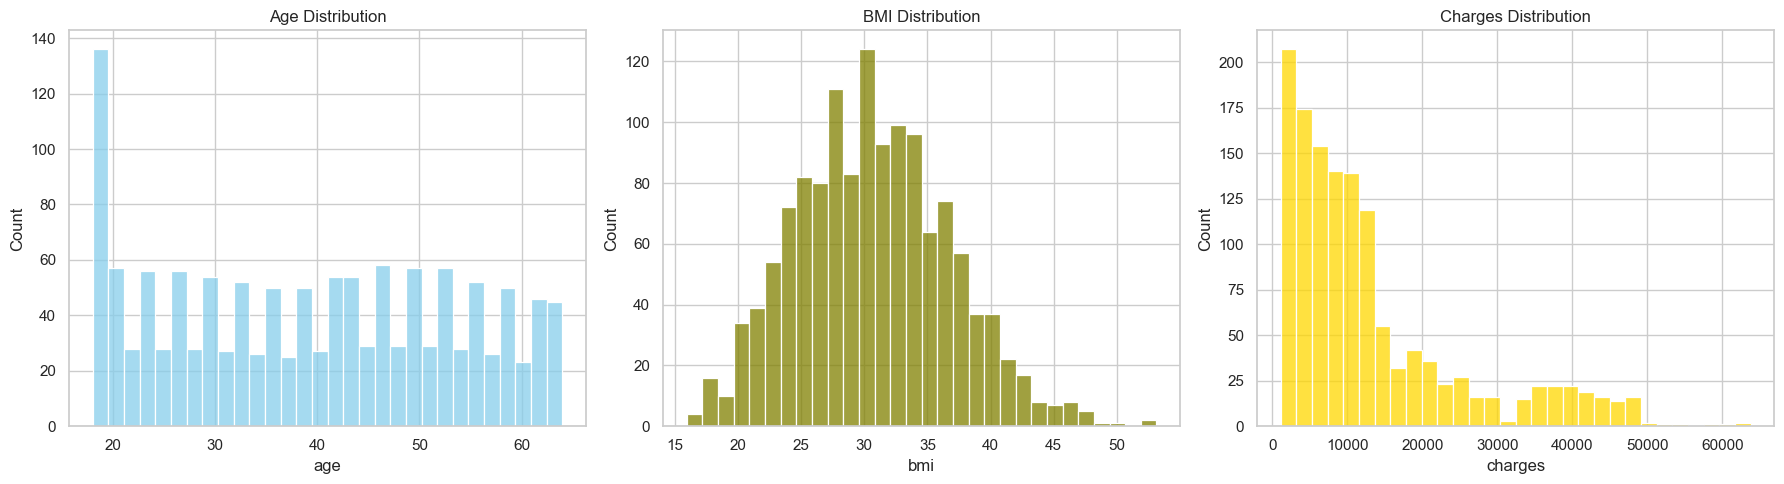

In [13]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['age'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(df['bmi'], bins=30, ax=axes[1], color='olive')
axes[1].set_title('BMI Distribution')

sns.histplot(df['charges'], bins=30, ax=axes[2], color='gold')
axes[2].set_title('Charges Distribution')

plt.tight_layout()
plt.show()

##### Insights
- The age distribution is fairly uniform, indicating a good mix of different ages in the dataset.
- The BMI distribution appears to be normally distributed, centering around the mid-30s.
- The charges distribution is right-skewed, showing that most people have lower insurance charges, with a few outliers having very high charges.

#### 4.3 Visualizing the Comparison of the Region.
- Count Plot

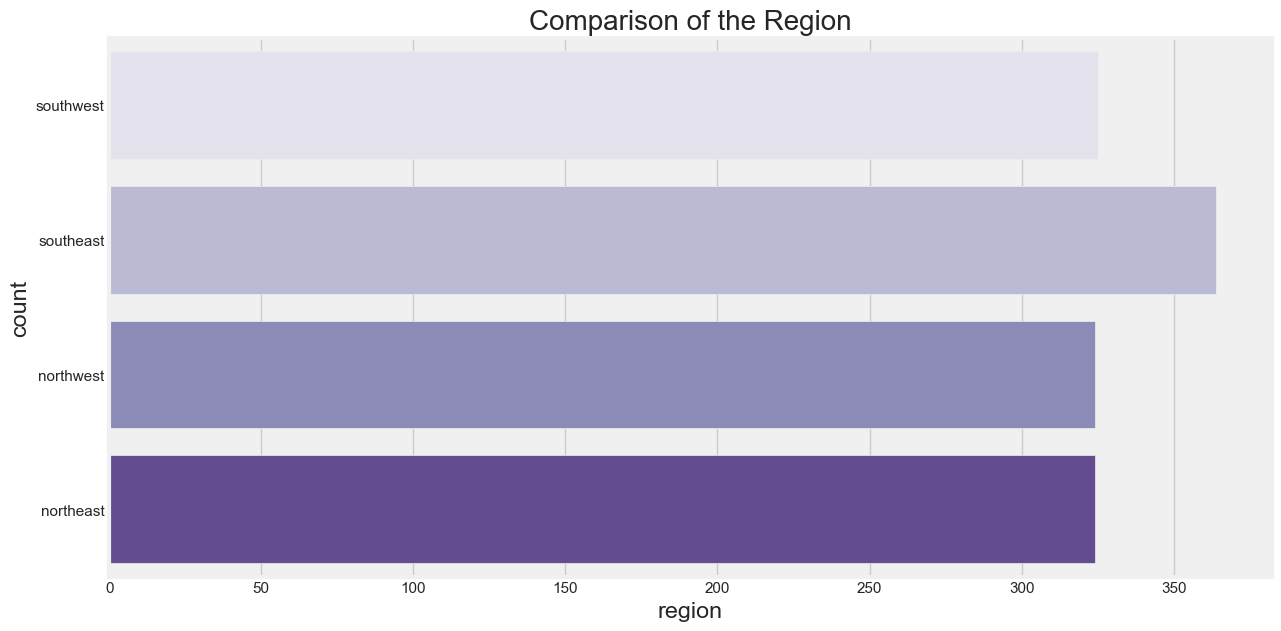

In [14]:
plt.figure(figsize=(15,7))
plt.style.use('fivethirtyeight')
sns.countplot(df['region'], palette = 'Purples')
plt.title('Comparison of the Region', fontweight = 30, fontsize = 20)
plt.xlabel('region')
plt.ylabel('count')
plt.show()

##### Insights
- The Majority which takes the insurance lives in southeast region.

#### 4.4 Exploring by Visualizing the Sex (i.e gender) column
- CountPlot
- Pie Chart

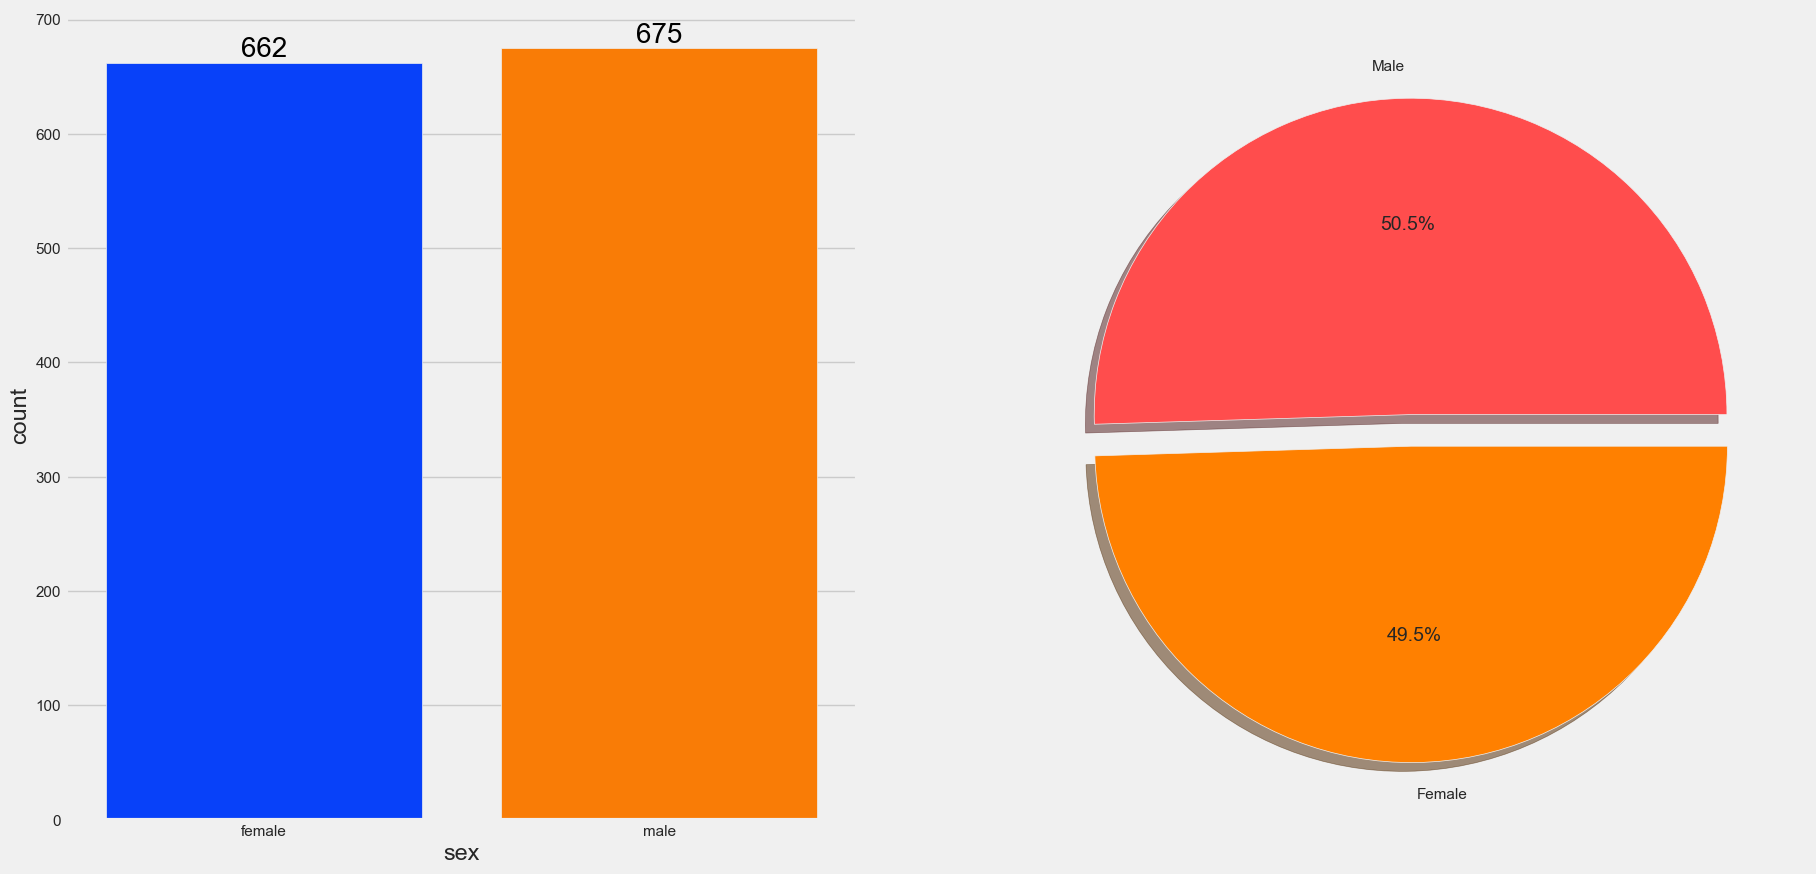

In [15]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights
- There is no such conclusion found on counting the sex because Male and Female is almose equal. In which Female is 662 and Male is 675.

#### 4.5 Exploring by Visualizing the Smoker column
- Count Plot
- Pie Plot

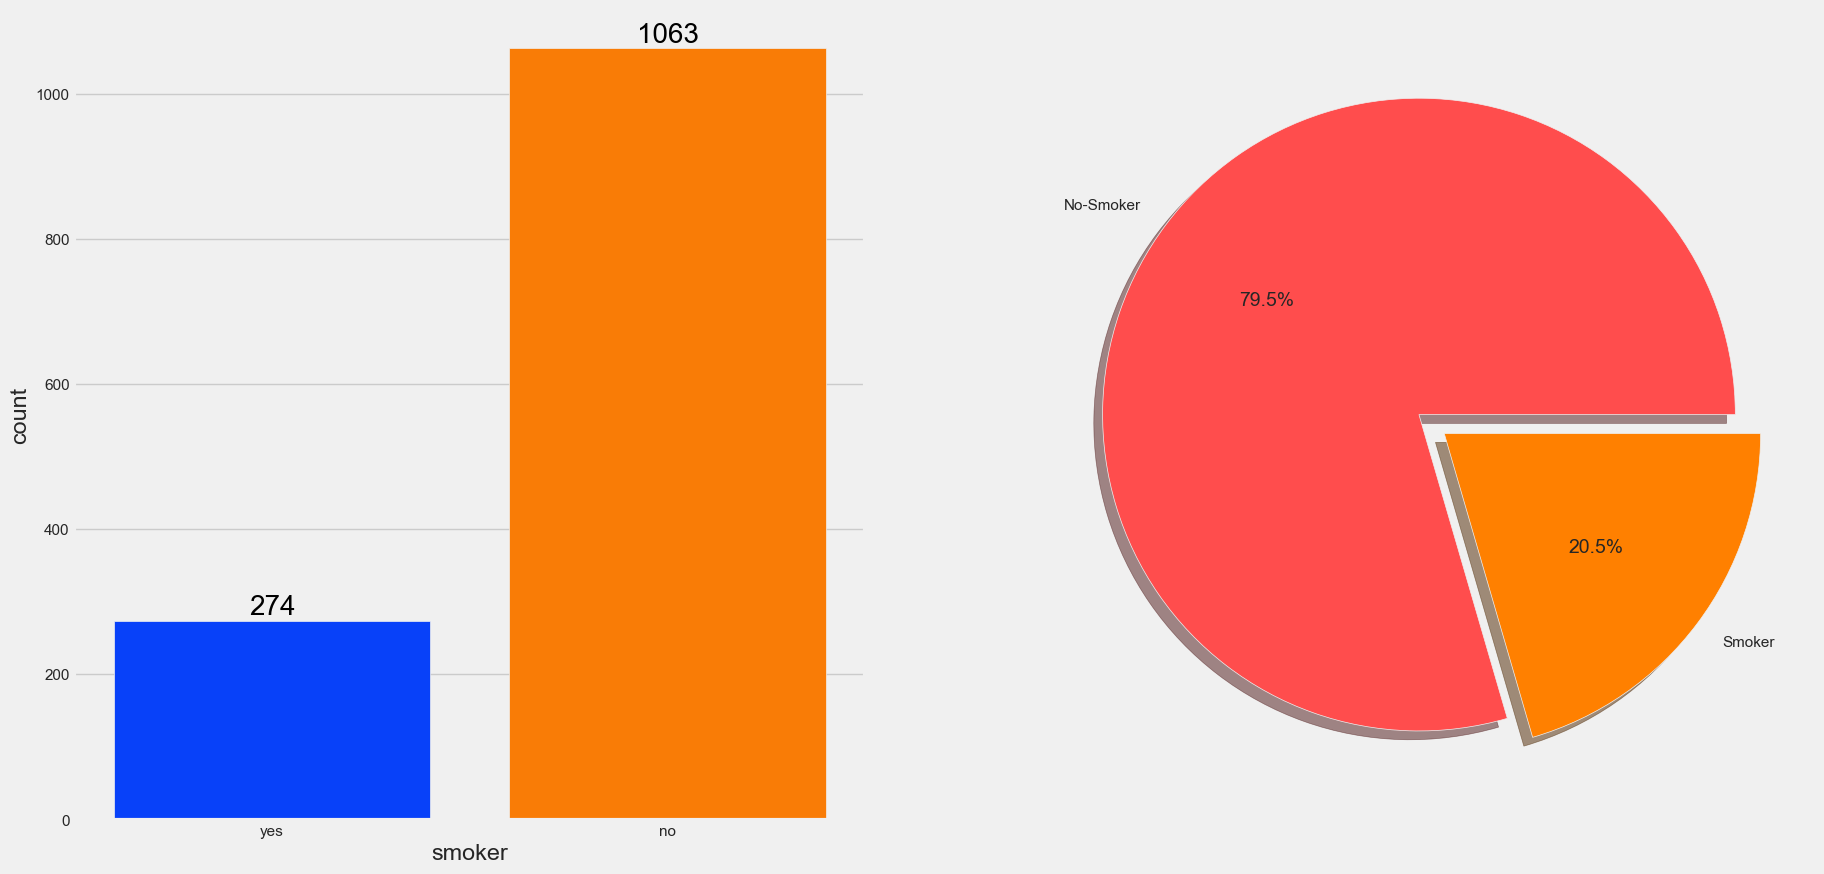

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['smoker'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['smoker'].value_counts(),labels=['No-Smoker','Smoker'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights
- We clearly see that the majority is non-smoker, which is 1063 person which is 79.5% of overall and the remaining 274 is a smoker which is 20.5% of overall.

#### 4.6 Visualizing the Body Mass Index in Different Region
- Bar Plot

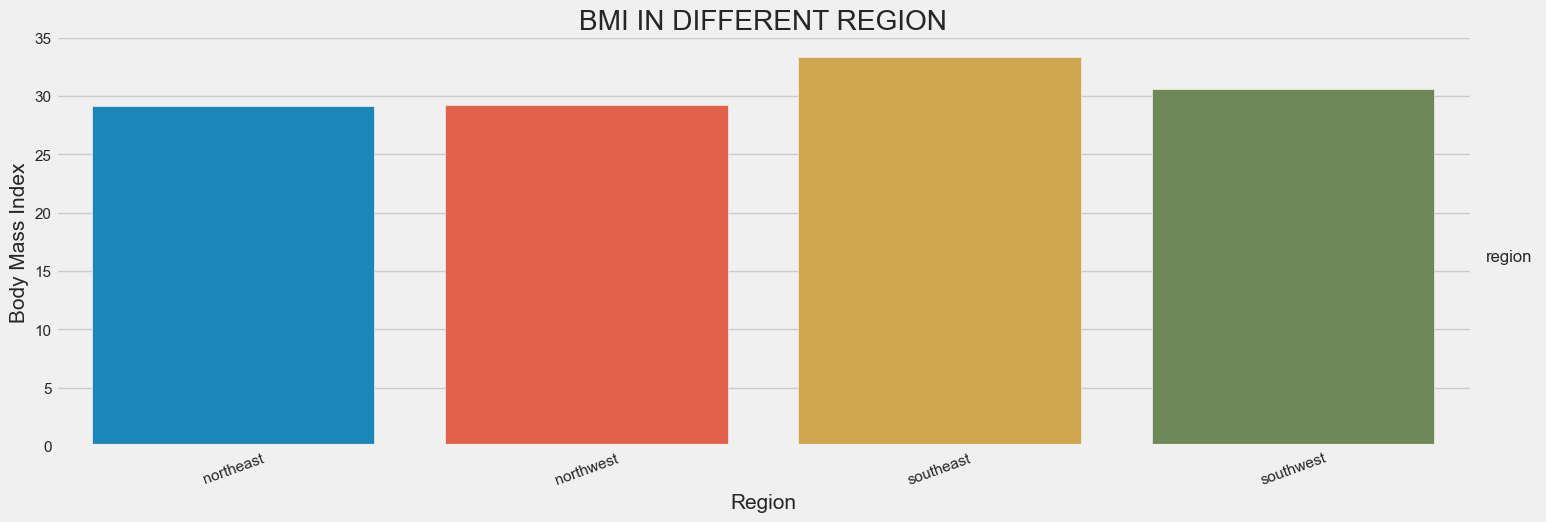

In [17]:
d1= df['bmi'].groupby(df['region'])
d2= d1.mean()
sns.catplot(data=d2.reset_index(), x='region', y='bmi', kind='bar',aspect=3, hue= 'region')
plt.title('BMI IN DIFFERENT REGION')
plt.xticks(rotation=20)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Body Mass Index', fontsize=15)
plt.show()

##### Insights
- The BMI in southeast region is higher followed by southwest and then northeast and northwest.

#### 4.7 Visualizing the Charges in Different Region

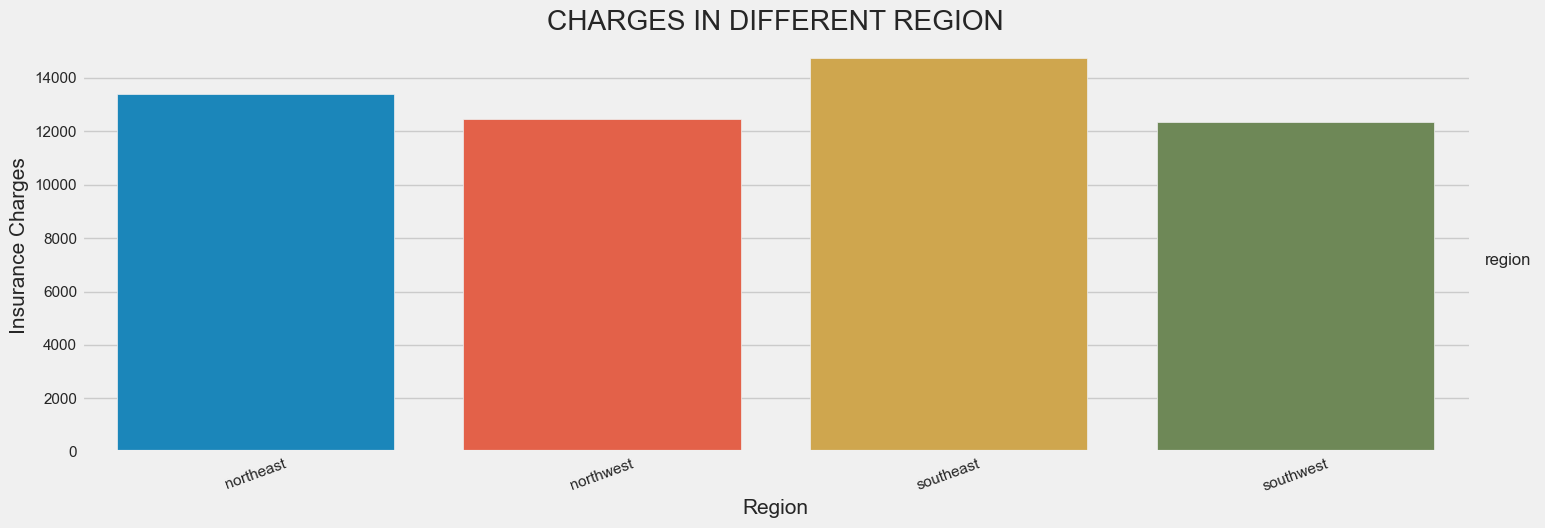

In [18]:
d1= df['charges'].groupby(df['region'])
d2= d1.mean()
sns.catplot(data=d2.reset_index(), x='region', y='charges', kind='bar',aspect=3, hue= 'region')
plt.title('CHARGES IN DIFFERENT REGION')
plt.xticks(rotation=20)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Insurance Charges', fontsize=15)
plt.show()

#### Insights
- Insurance charges are more in southeast region followed by northeast then northwest and southwest.

#### 4.8 Visualizing the children in different region
- Pie Chart

In [19]:
fig = go.Figure(data=[go.Pie(labels=df['region'], values=df['children'], pull=[0.01, 0.1, 0.01, 0.01])])
fig.update_layout(scene=dict(aspectmode="data"))
fig.show()

#### Insight
- Childrens in every region is almost same.
- southeast region have more childrens.

#### 4.9 Correlation between Numerical Features
- Heatmap

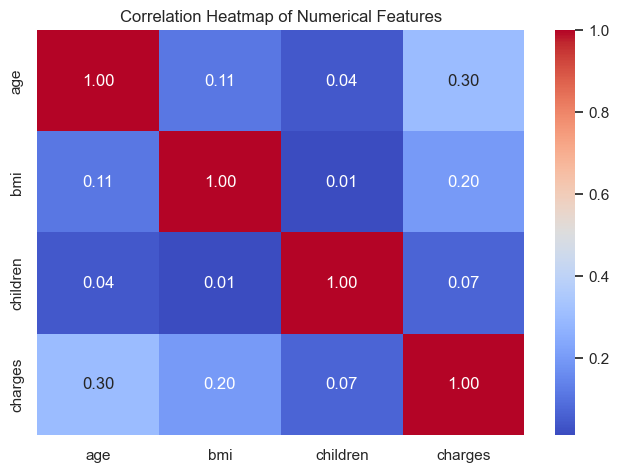

In [20]:
# Creating a numerical dataframe
df_num = df[['age', 'bmi', 'children', 'charges']]

# Creating heatmap of numerical features
sns.set(style='whitegrid')
plt.figure(figsize=(7, 5))
corr = df_num.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### Insights
- The correlation between the numerical features are not conclusable.

#### Conclusion
- The persons whose age is between 18 to 64 takes more the insurance.
- Charges for male benificiary is higher than the female benificiary.
- Charges for the smoker's is high. But majority of a person is non-smoker.
- Most of the people have lower charges, some have the higher charges.